In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [2]:
df=pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')
df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [4]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df['volatile acidity'].fillna(value=0.339691,inplace=True)
df['pH'].fillna(value=3.218395,inplace=True)
df['fixed acidity'].fillna(value=7.000000,inplace=True)
df['sulphates'].fillna(value=0.510000,inplace=True)
df.drop(['citric acid','residual sugar','chlorides'],axis=1,inplace=True)

In [7]:
a=[2,6,9]
label=['bad','good']
df['quality']=pd.cut(df['quality'],bins=a,labels=label)

In [8]:
df.head()

,type,fixed acidity,volatile acidity,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,white,6.3,0.30,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,white,8.1,0.28,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,white,7.2,0.23,47.0,186.0,0.9956,3.19,0.40,9.9,bad
4,white,7.2,0.23,47.0,186.0,0.9956,3.19,0.40,9.9,bad


In [9]:
df.quality.value_counts()

bad     5220
good    1277
Name: quality, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_target=LabelEncoder()
df['quality']=labelencoder_target.fit_transform(df['quality'])

In [11]:
df.quality.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
Name: quality, dtype: int64

In [12]:
df.describe()

,fixed acidity,volatile acidity,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216246,0.339691,30.525319,115.744574,0.994697,3.218395,0.531202,10.491801,0.196552
std,1.295779,0.164548,17.749400,56.521855,0.002999,0.160637,0.148769,1.192712,0.397421
min,3.800000,0.080000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [13]:
corr=df.corr()

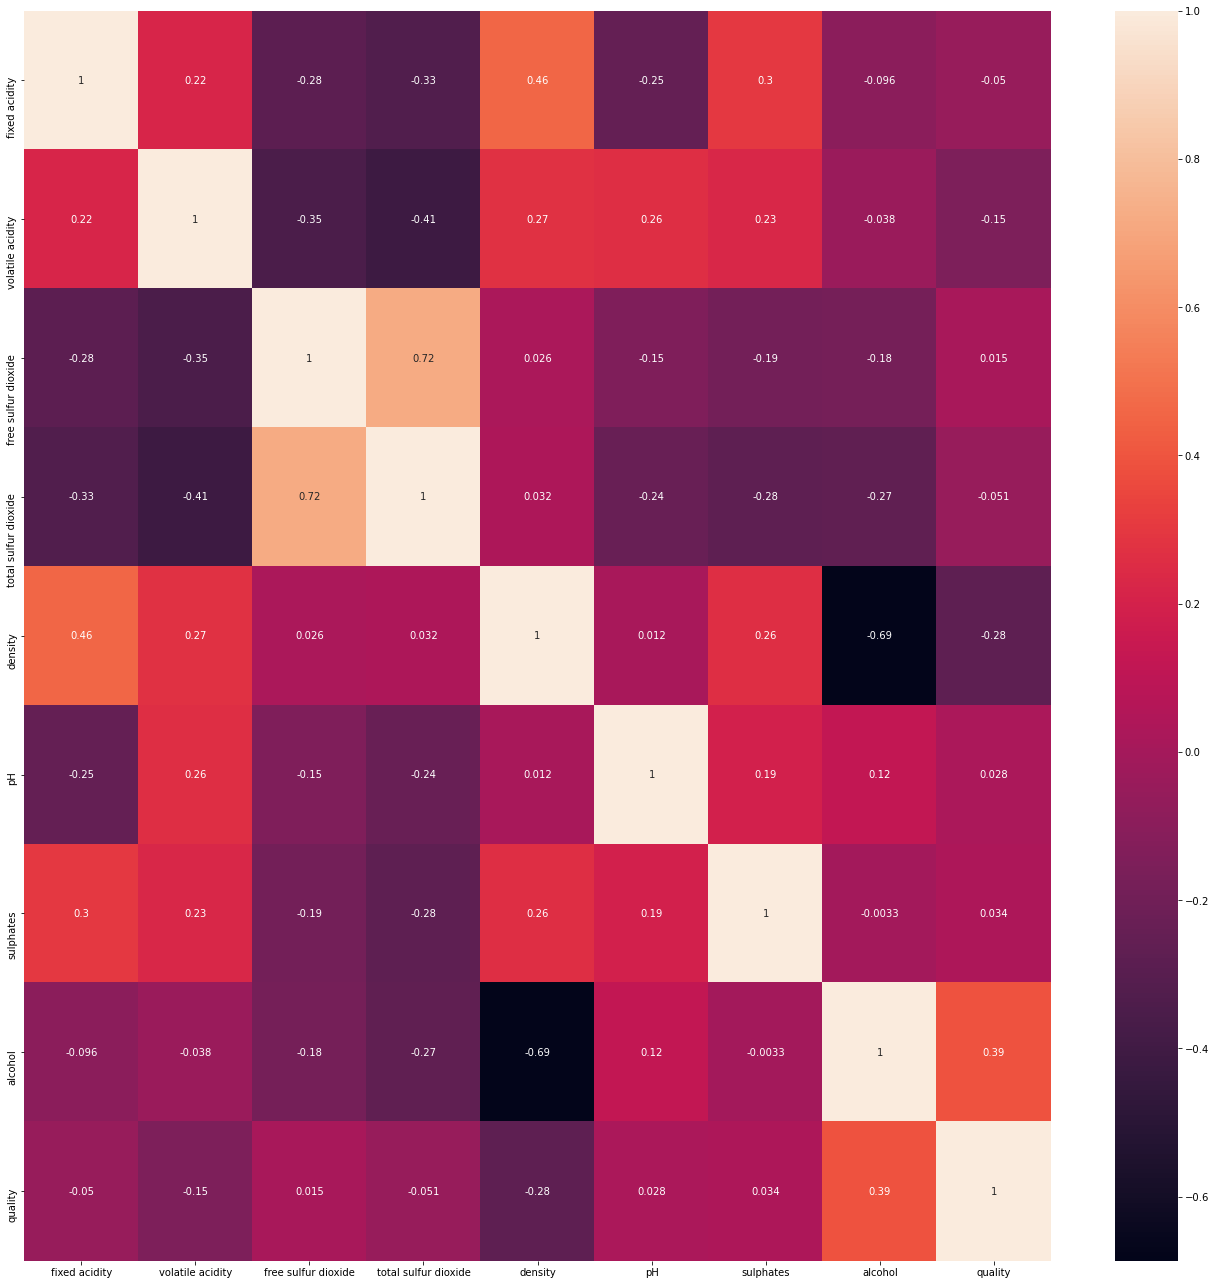

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[23,23])
sns.heatmap(df.corr(),annot=True)

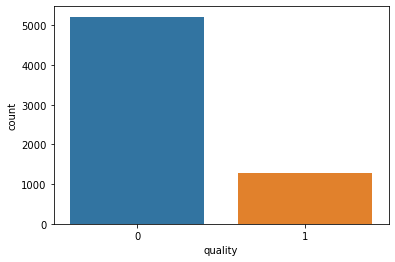

In [15]:
sns.countplot('quality',data=df)

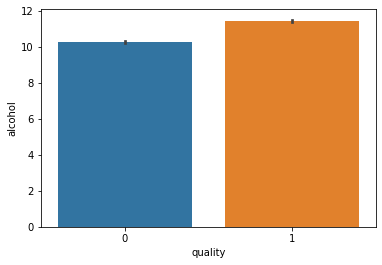

In [16]:
sns.barplot(x='quality',y='alcohol',data=df)

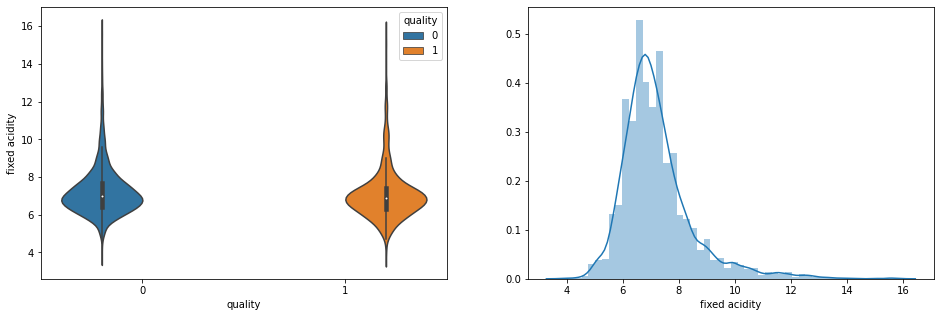

In [17]:
f,(axes,sa)= plt.subplots(1,2,figsize=(16,5))
sns.distplot(df['fixed acidity'],ax=sa)
sns.violinplot(x='quality',y='fixed acidity',data=df,hue=df['quality'],ax=axes)

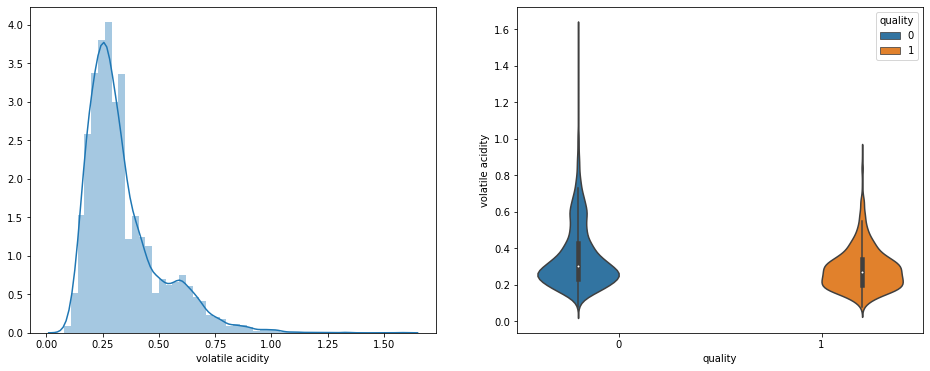

In [18]:
f,axes=plt.subplots(1,2,figsize=(16,6))
sns.distplot(df['volatile acidity'],ax=axes[0])
sns.violinplot(x='quality',y='volatile acidity',data=df,hue=df['quality'],ax=axes[1])

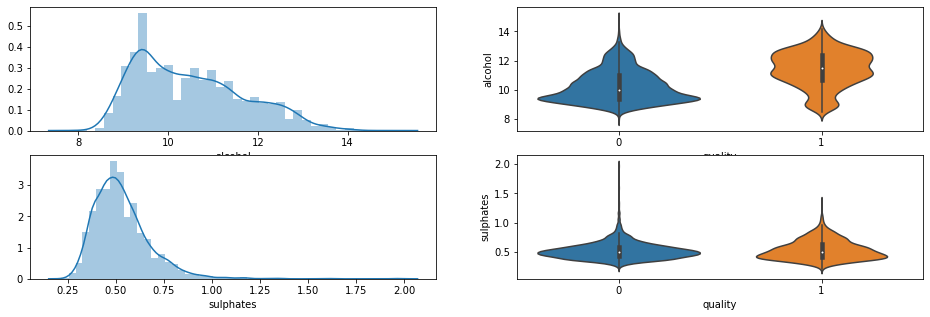

In [19]:
f,axes=plt.subplots(2,2,figsize=(16,5))
sns.distplot(df['alcohol'],ax=axes[0,0])
sns.violinplot(x='quality',y='alcohol',data=df,ax=axes[0,1])
sns.distplot(df['sulphates'],ax=axes[1,0])
sns.violinplot(x='quality',y='sulphates',data=df,ax=axes[1,1])

In [20]:
df.drop(['density','volatile acidity'],axis=1,inplace=True)

In [21]:
df=pd.get_dummies(df,columns=['type'],drop_first=True)

In [22]:
df

,fixed acidity,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,type_white
0,7.0,45.0,170.0,3.00,0.45,8.8,0,1
1,6.3,14.0,132.0,3.30,0.49,9.5,0,1
2,8.1,30.0,97.0,3.26,0.44,10.1,0,1
3,7.2,47.0,186.0,3.19,0.40,9.9,0,1
4,7.2,47.0,186.0,3.19,0.40,9.9,0,1
...,...,...,...,...,...,...,...,...
6492,6.2,32.0,44.0,3.45,0.58,10.5,0,0
6493,5.9,39.0,51.0,3.52,0.51,11.2,0,0
6494,6.3,29.0,40.0,3.42,0.75,11.0,0,0
6495,5.9,32.0,44.0,3.57,0.71,10.2,0,0


In [23]:
y=df.quality
y=y.values.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:

X=df.drop('quality',axis=1).values
X

array([[  7.  ,  45.  , 170.  , ...,   0.45,   8.8 ,   1.  ],
       [  6.3 ,  14.  , 132.  , ...,   0.49,   9.5 ,   1.  ],
       [  8.1 ,  30.  ,  97.  , ...,   0.44,  10.1 ,   1.  ],
       ...,
       [  6.3 ,  29.  ,  40.  , ...,   0.75,  11.  ,   0.  ],
       [  5.9 ,  32.  ,  44.  , ...,   0.71,  10.2 ,   0.  ],
       [  6.  ,  18.  ,  42.  , ...,   0.66,  11.  ,   0.  ]])

In [25]:
X,y

(array([[  7.  ,  45.  , 170.  , ...,   0.45,   8.8 ,   1.  ],
        [  6.3 ,  14.  , 132.  , ...,   0.49,   9.5 ,   1.  ],
        [  8.1 ,  30.  ,  97.  , ...,   0.44,  10.1 ,   1.  ],
        ...,
        [  6.3 ,  29.  ,  40.  , ...,   0.75,  11.  ,   0.  ],
        [  5.9 ,  32.  ,  44.  , ...,   0.71,  10.2 ,   0.  ],
        [  6.  ,  18.  ,  42.  , ...,   0.66,  11.  ,   0.  ]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [27]:
X_train.shape

(4872, 7)

# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X,y)

array([[-0.16689773,  0.81556531,  0.9599756 , ..., -0.54586788,
        -1.41855821,  0.57136659],
       [-0.70715481, -0.93110705,  0.28761754, ..., -0.27697438,
        -0.83161516,  0.57136659],
       [ 0.68207768, -0.02959874, -0.33165963, ..., -0.61309126,
        -0.32852111,  0.57136659],
       ...,
       [-0.70715481, -0.08594301, -1.34019672, ...,  1.47083338,
         0.42611996, -1.75018984],
       [-1.01587314,  0.0830898 , -1.26942219, ...,  1.20193988,
        -0.2446721 , -1.75018984],
       [-0.93869356, -0.70572997, -1.30480946, ...,  0.865823  ,
         0.42611996, -1.75018984]])

# LogisticRegression Classifier

In [29]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=clf,X=X_train,y=y_train.ravel(),cv=7)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.81752874, 0.79454023, 0.81609195, 0.80172414, 0.80028736,
       0.79454023, 0.81609195])

In [31]:
from sklearn.metrics import accuracy_score
y_pred_train=clf.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.8048029556650246

In [32]:
from sklearn.metrics import accuracy_score
y_pred_test=clf.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.820923076923077

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[1266,   49],
       [ 242,   68]])

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rand=RandomForestClassifier(n_estimators=500,criterion='entropy',max_features=6,max_depth=10,random_state=42)
clf_rand.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       n_estimators=500, random_state=42)

In [35]:
cross_val_score(estimator=clf_rand,X=X_train,y=y_train.ravel(),cv=7).mean()

0.8569376026272578

In [36]:
y_pred_train=clf_rand.predict(X_train)
accuracy_score(y_train,y_pred_train)


0.9382183908045977

In [37]:
y_pred_test=clf_rand.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.8738461538461538

In [38]:
confusion_matrix(y_test,y_pred_test)

array([[1261,   54],
       [ 151,  159]])

# Using HyperParameter Optimization(grid Search CV)

In [39]:
from sklearn.model_selection import GridSearchCV
random_classifier = RandomForestClassifier()
parameters = { 'max_features':np.arange(4,7),'n_estimators':[58],'min_samples_leaf': [5,10,15],'criterion':['entropy']}
random_grid = GridSearchCV(random_classifier, parameters, cv = 7)

In [40]:
random_grid.fit(X_train,y_train.ravel())

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_features': array([4, 5, 6]),
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [58]})

In [41]:
random_grid.best_params_

{'criterion': 'entropy',
 'max_features': 5,
 'min_samples_leaf': 5,
 'n_estimators': 58}

In [42]:
cross_val_score(estimator=random_classifier,X=X_train,y=y_train.ravel(),cv=7).mean()

0.8782840722495895

In [43]:
random_grid.score(X_train,y_train)

0.9415024630541872

In [44]:
y_pred_train=random_grid.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.9415024630541872

In [45]:
y_pred_test=random_grid.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.8769230769230769

In [46]:
confusion_matrix(y_test,y_pred_test)

array([[1268,   47],
       [ 153,  157]])

# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
cls_nb=GaussianNB()
cls_nb.fit(X_train,y_train.ravel())

GaussianNB()

In [48]:
cross_val_score(estimator=cls_nb,X=X_train,y=y_train.ravel(),cv=7).mean()

0.807471264367816

In [49]:
y_prd=cls_nb.predict(X_train)
accuracy_score(y_train,y_prd)

0.8074712643678161

In [50]:
y_prd_ttest=cls_nb.predict(X_test)
accuracy_score(y_test,y_prd_ttest)

0.8184615384615385

In [51]:
confusion_matrix(y_test,y_prd_ttest)

array([[1211,  104],
       [ 191,  119]])